In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from models import *
np.random.seed(0)
sns.set_context('talk', font_scale=1.5)

Using TensorFlow backend.


Text(0,0.5,'$x_{s,1}$')

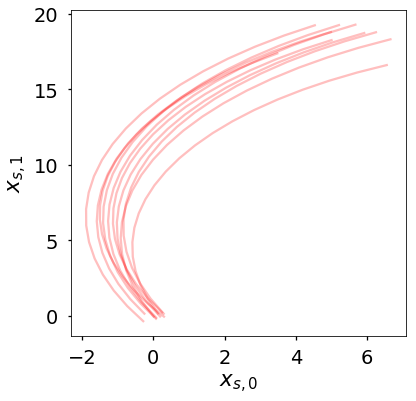

In [2]:
A = np.array([[-.5, -2], [2, -.2]])
A = np.random.randn(2, 2)

x0 = np.random.rand(2)
def rotate_matrix(theta):
    theta = theta /(180./np.pi)  # convert to radians
    W = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return W

def lds_update(x, b, W):
    return b + np.matmul(x, W)

n_samples = 10
x = []
fig = plt.figure(figsize=(6, 6))
for _ in range(n_samples):
    x0 = []
    x0.append(np.random.randn(2)*0.2)
    theta = 4.0 + np.random.randn() * 1.0
    b = np.array([-0.4, 1]) + np.random.randn(2) * 0.05
    for ii in range(20):
        x0.append(lds_update(x0[-1], b, rotate_matrix(4)))
        
    x0 = np.array(x0)
    plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
    x.append(x0)
    
plt.xlabel(r'$x_{s,0}$')
plt.ylabel(r'$x_{s,1}$')
# plt.title('Rotation Traces')

In [3]:
# train an event model (A Linear Dynamical System)

from tqdm import tqdm_notebook

def train_model(e):
    for x_samp in tqdm_notebook(x, total=n_samples):
        e.new_token()
        e.update_f0(x_samp[0, :])
        for ii in range(1, x_samp.shape[0] - 1):
            _x = x_samp[ii, :]
            _y = x_samp[ii+1, :]
            e.update(_x, _y)


# run the model generatively for each event
def run_generative(e, n_run=25):
    x0 = [np.reshape(e.predict_f0(), (1, 2))]
    for t in range(1, n_run):
        x_ = np.concatenate(x0)[t-1, :]
        x0.append(e.predict_next(x_).reshape(1, 2))
    return np.array(x0).reshape(-1, 2)

def plot_res(x0):
    #plot the generative sweep
    fig = plt.figure(figsize=(6, 6))
    h0 = plt.plot(x0[:, 0], x0[:, 1], '^-', color='k', label='Generative Prediction')[0]

    # plot the original LDS 
    for x0  in x:
        plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
    h1 = plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25, label='Observation')[0]
    handles = [h0, h1]


    plt.xlabel(r'$x_{s,0}$')
    plt.ylabel(r'$x_{s,1}$')
    plt.title('Rotation Traces')
    plt.legend(handles=handles, loc='lower right')
    

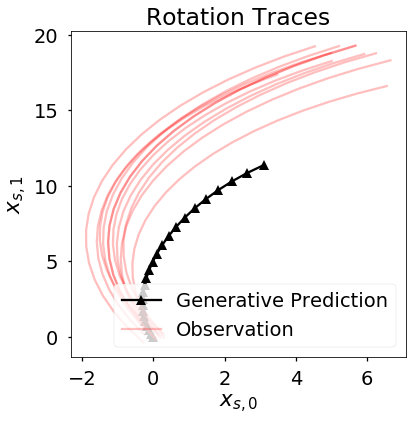

In [4]:
e = LinearDynamicSystem(d=2, var_df0=1, var_scale0=0.1, eta=0.011)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

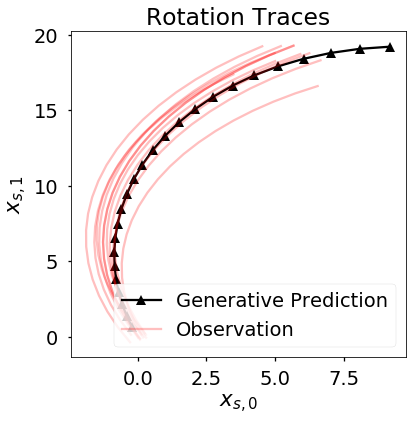

In [5]:
e = KerasLDS(d=2, var_df0=1, var_scale0=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

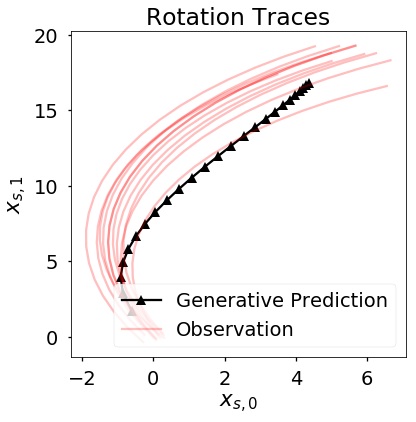

In [6]:
e = KerasMultiLayerPerceptron(d=2, var_df0=1, var_scale0=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

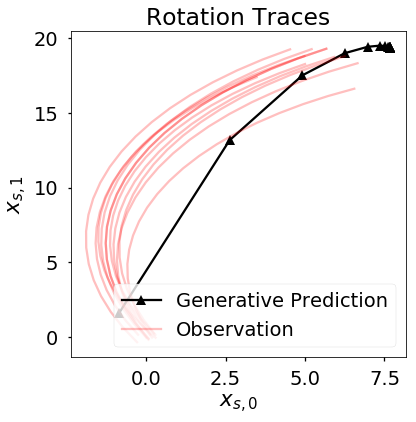

In [7]:
e = KerasSRN(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

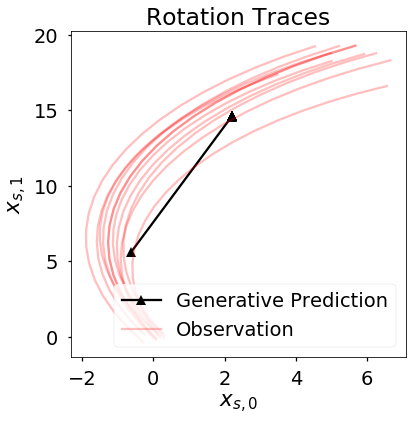

In [8]:
e = KerasRecurrentMLP(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

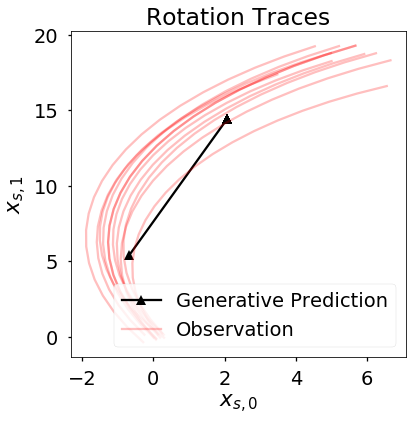

In [9]:
e = KerasGRU(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1, dropout=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

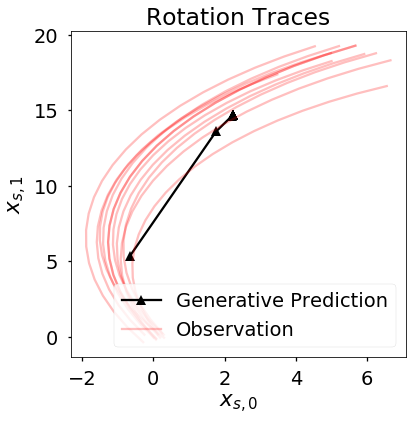

In [10]:
e = KerasLSTM(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1, dropout=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

# Peroidic Function

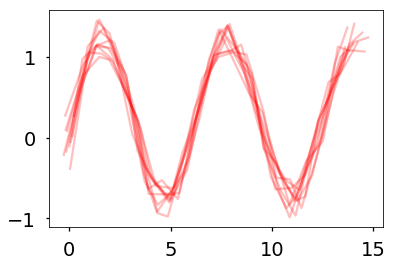

In [12]:
x = []
for _ in range(n_samples):
    x0 = []
    x0.append(np.random.randn(2)*0.2)
    x0[0][1] = np.sin(x0[0][1])
    for ii in range(20):
        xi = x0[-1][0] + 0.5 + np.abs(np.random.random() * 0.4)
        x0.append([xi, np.sin(xi)+ np.random.rand() * 0.5 ])
    x0 = np.array(x0)
    plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
    x.append(x0)


In [13]:
def train_model(e):
    for x_samp in tqdm_notebook(x, total=n_samples):
        e.new_token()
        e.update_f0(x_samp[0, :])
        for ii in range(1, x_samp.shape[0] - 1):
            _x = x_samp[ii, :]
            _y = x_samp[ii+1, :]
            e.update(_x, _y)


# run the model generatively for each event
def run_generative(e, n_run=25):
    x0 = [np.reshape(e.predict_f0(), (1, 2))]
    for t in range(1, n_run):
        x_ = np.concatenate(x0)[t-1, :]
        x0.append(e.predict_next(x_).reshape(1, 2))
    return np.array(x0).reshape(-1, 2)

def plot_res(x0):
    #plot the generative sweep
    fig = plt.figure(figsize=(6, 6))
    h0 = plt.plot(x0[:, 0], x0[:, 1], '^-', color='k', label='Generative Prediction')[0]

    # plot the original LDS 
    for x0  in x:
        plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
    h1 = plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25, label='Observation')[0]
    handles = [h0, h1]


    plt.xlabel(r'$x_{s,0}$')
    plt.ylabel(r'$x_{s,1}$')
    plt.title('Rotation Traces')
    plt.legend(handles=handles, loc='lower right')

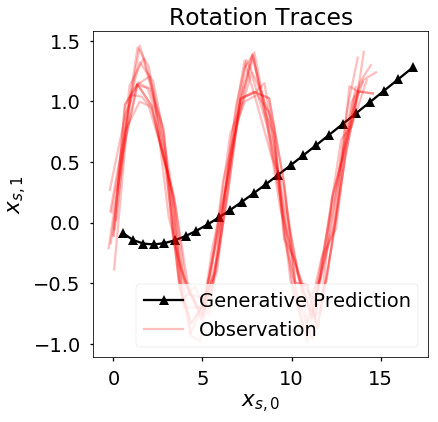

In [14]:
e = KerasLDS(d=2, var_df0=1, var_scale0=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

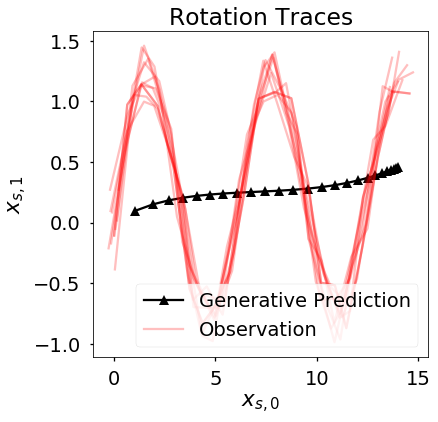

In [15]:
e = KerasMultiLayerPerceptron(d=2, var_df0=1, var_scale0=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

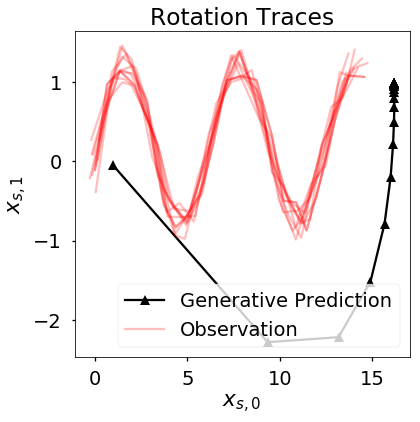

In [16]:
e = KerasSRN(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

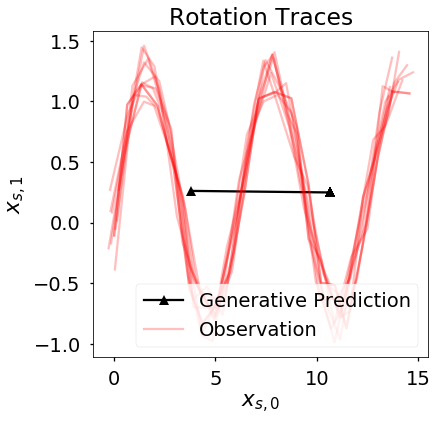

In [17]:
e = KerasRecurrentMLP(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

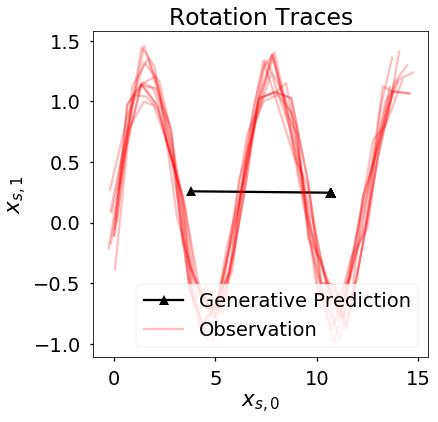

In [18]:
e = KerasGRU(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1, dropout=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)

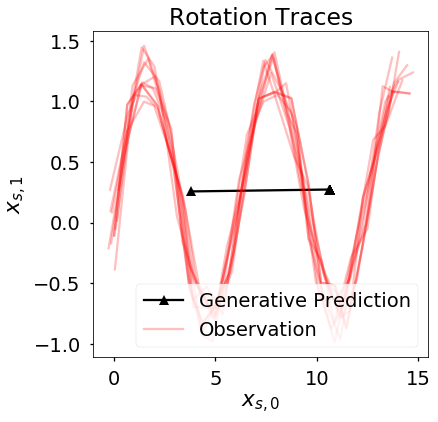

In [19]:
e = KerasLSTM(d=2, var_df0=1, var_scale0=0.1, l2_regularization=0.1, dropout=0.1)
train_model(e)
x0 = run_generative(e)
plot_res(x0)